In [3]:
# Librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Carga del dataset
df = pd.read_csv("/content/drive/MyDrive/Portfolio/Analisis_Empleados/dataset_rrhh.csv")

# Vista general
df.head()


,EmpleadoID,Nombre,Edad,Género,Área,Antigüedad,Evaluación_Desempeño,Satisfacción_Laboral,Balance_Vida_Trabajo,Horas_Extra,Estado_Civil,Salario,Renunció
0,1,Lautaro Pérez,40,Femenino,Finanzas,5,1,4,3,1,Soltero/a,1432000.0,0
1,2,Joaquín Rodríguez,22,Masculino,Ventas,3,1,1,1,0,Soltero/a,1428000.0,1
2,3,Santiago López,26,Masculino,Finanzas,10,1,5,1,0,Casado/a,1406000.0,1
3,4,Mateo Fernández,34,Femenino,Logística,30,1,5,1,0,Soltero/a,1426000.0,1
4,5,Emma Martínez,47,Femenino,Ventas,29,5,5,4,1,En pareja,911000.0,0


In [4]:
# Info general del dataset
df.info()

# Verificamos si hay valores nulos
df.isnull().sum()

# Estadísticas generales
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EmpleadoID            200 non-null    int64  
 1   Nombre                200 non-null    object 
 2   Edad                  200 non-null    int64  
 3   Género                200 non-null    object 
 4   Área                  200 non-null    object 
 5   Antigüedad            200 non-null    int64  
 6   Evaluación_Desempeño  200 non-null    int64  
 7   Satisfacción_Laboral  200 non-null    int64  
 8   Balance_Vida_Trabajo  200 non-null    int64  
 9   Horas_Extra           200 non-null    int64  
 10  Estado_Civil          200 non-null    object 
 11  Salario               200 non-null    float64
 12  Renunció              200 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 20.4+ KB


,EmpleadoID,Edad,Antigüedad,Evaluación_Desempeño,Satisfacción_Laboral,Balance_Vida_Trabajo,Horas_Extra,Salario,Renunció
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,2.000000e+02,200.000000
mean,100.500000,41.700000,14.335000,3.040000,2.970000,3.135000,0.520000,1.257615e+06,0.530000
std,57.879185,11.004796,8.468254,1.434815,1.410335,1.420162,0.500854,3.531121e+05,0.500352
min,1.000000,22.000000,0.000000,1.000000,1.000000,1.000000,0.000000,6.050000e+05,0.000000
25%,50.750000,32.000000,7.000000,2.000000,2.000000,2.000000,0.000000,9.367500e+05,0.000000
50%,100.500000,42.000000,15.000000,3.000000,3.000000,3.000000,1.000000,1.319500e+06,1.000000
75%,150.250000,51.000000,21.000000,4.000000,4.000000,4.000000,1.000000,1.552500e+06,1.000000
max,200.000000,60.000000,30.000000,5.000000,5.000000,5.000000,1.000000,1.796000e+06,1.000000


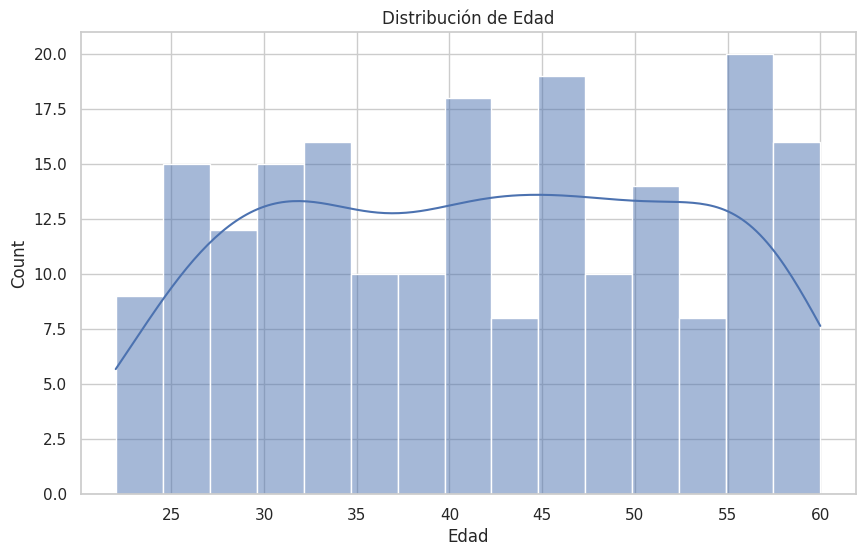

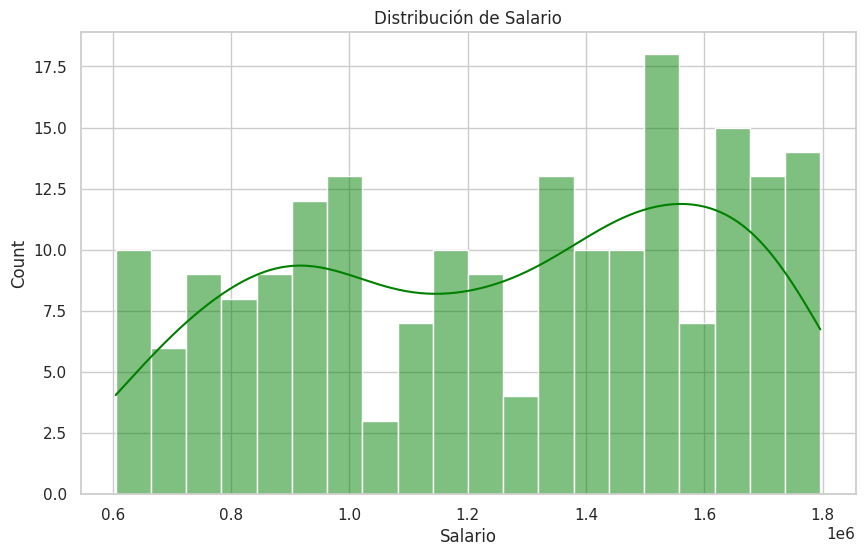

In [5]:
# Histograma de edades
sns.histplot(df['Edad'], bins=15, kde=True)
plt.title("Distribución de Edad")
plt.show()

# Distribución de salario
sns.histplot(df['Salario'], bins=20, kde=True, color='green')
plt.title("Distribución de Salario")
plt.show()


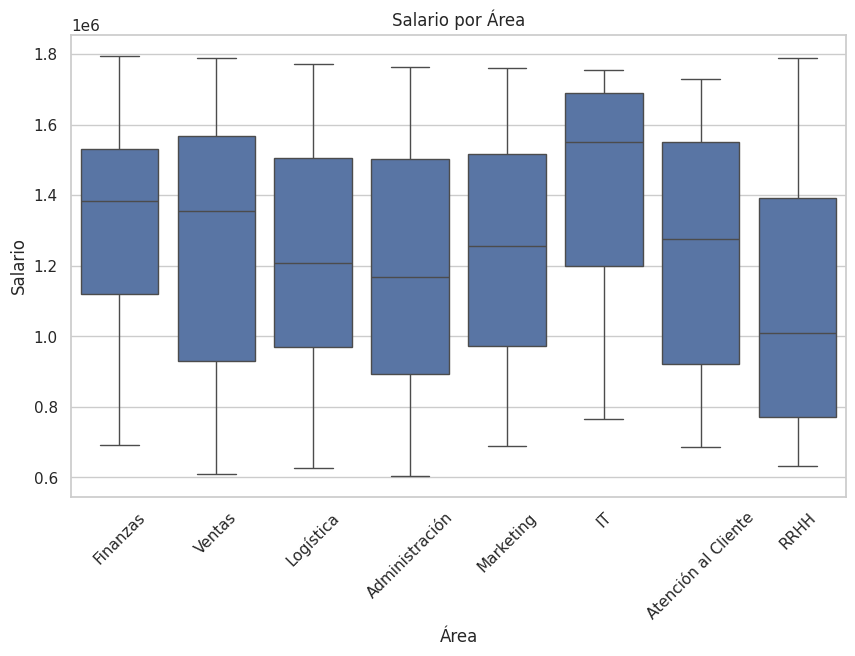

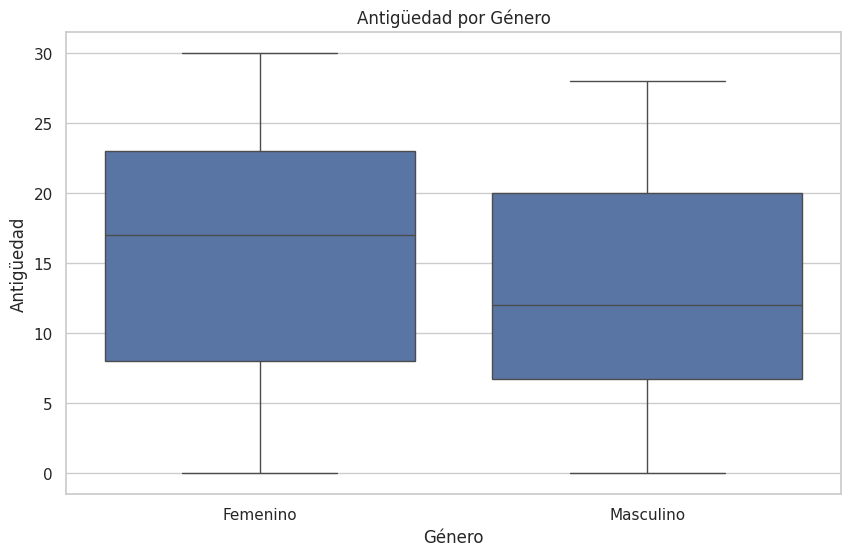

In [6]:
# Boxplot de salario por área
sns.boxplot(x="Área", y="Salario", data=df)
plt.xticks(rotation=45)
plt.title("Salario por Área")
plt.show()

# Boxplot de antigüedad por género
sns.boxplot(x="Género", y="Antigüedad", data=df)
plt.title("Antigüedad por Género")
plt.show()


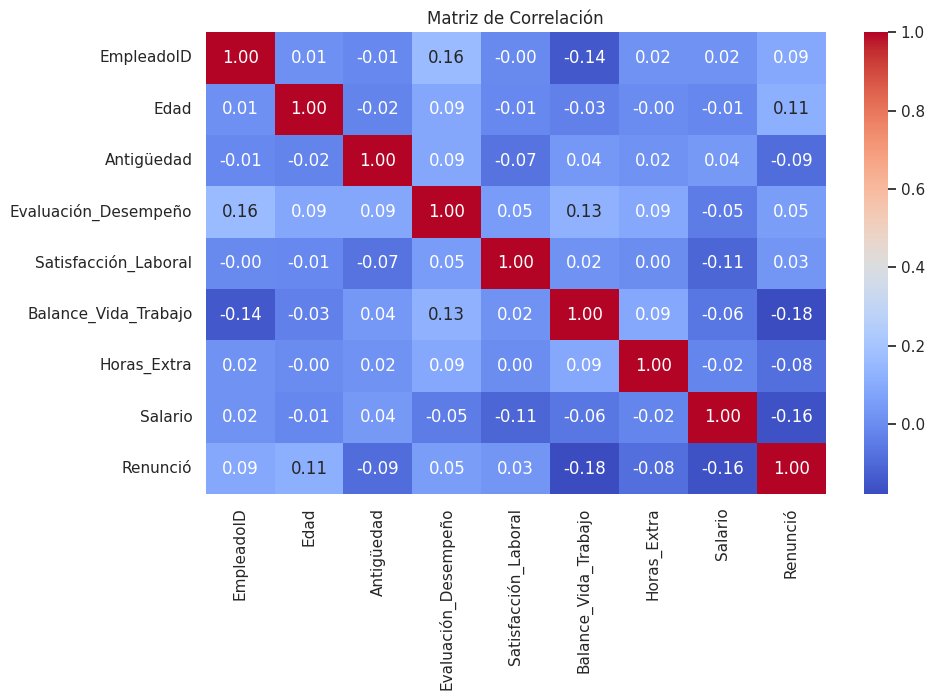

In [7]:
# Seleccionamos solo columnas numéricas
corr = df.select_dtypes(include=np.number).corr()

# Heatmap de correlación
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


Tasa de rotación:
Renunció
1    53.0
0    47.0
Name: proportion, dtype: float64


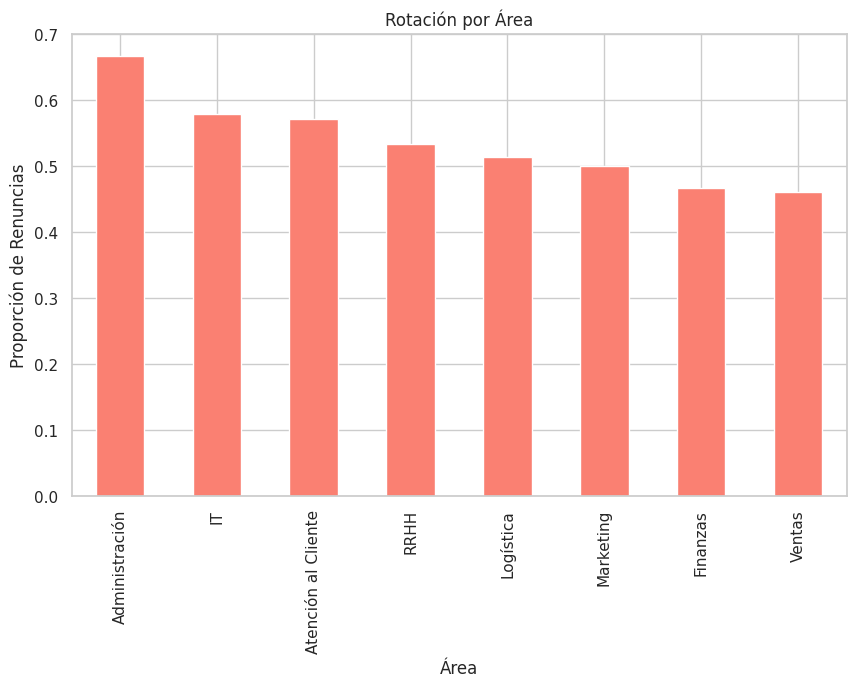

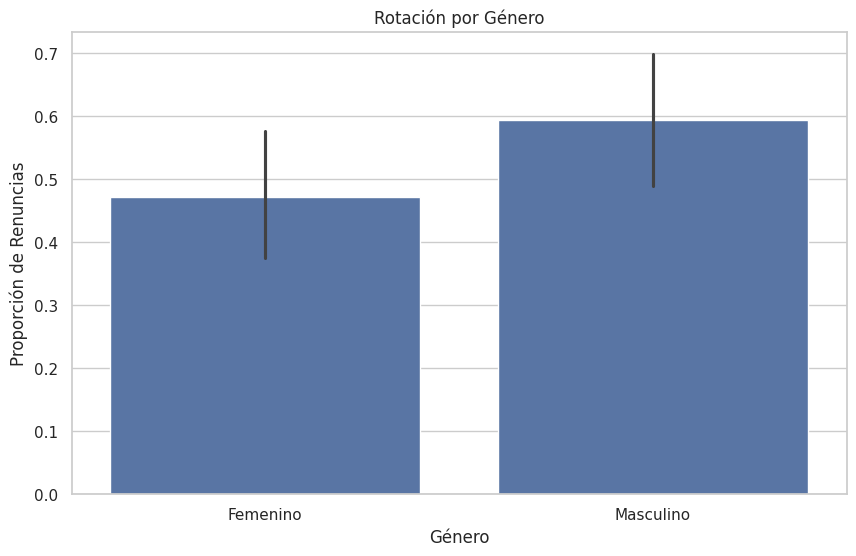

In [8]:
# Porcentaje de renuncias
rotacion = df['Renunció'].value_counts(normalize=True) * 100
print("Tasa de rotación:")
print(rotacion)

# Rotación por área
rotacion_area = df.groupby('Área')['Renunció'].mean().sort_values(ascending=False)
rotacion_area.plot(kind='bar', color='salmon')
plt.title("Rotación por Área")
plt.ylabel("Proporción de Renuncias")
plt.show()

# Rotación por género
sns.barplot(x="Género", y="Renunció", data=df)
plt.title("Rotación por Género")
plt.ylabel("Proporción de Renuncias")
plt.show()


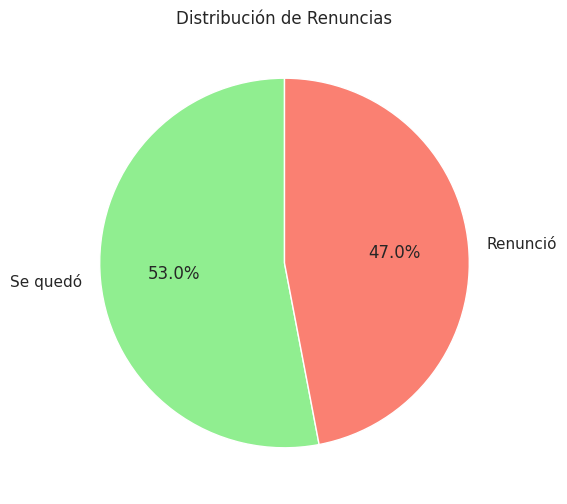

In [10]:
# Gráfico de pastel
df['Renunció'].value_counts().plot.pie(labels=["Se quedó", "Renunció"],
                                        autopct='%1.1f%%',
                                        startangle=90,
                                        colors=['lightgreen', 'salmon'])
plt.title("Distribución de Renuncias")
plt.ylabel("")
plt.show()


Área
Administración         66.666667
IT                     57.894737
Atención al Cliente    57.142857
RRHH                   53.333333
Logística              51.351351
Marketing              50.000000
Finanzas               46.666667
Ventas                 46.153846
Name: Renunció, dtype: float64


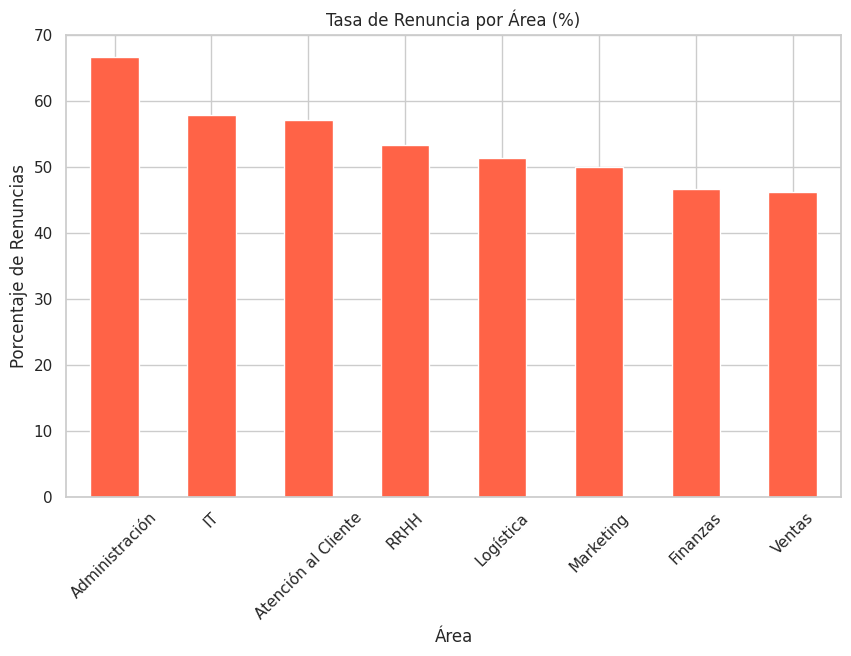

In [11]:
# Tasa de renuncia por área (promedio de la columna Renunció)
rotacion_por_area = df.groupby('Área')['Renunció'].mean().sort_values(ascending=False) * 100
print(rotacion_por_area)

# Gráfico de barras
rotacion_por_area.plot(kind='bar', color='tomato')
plt.title("Tasa de Renuncia por Área (%)")
plt.ylabel("Porcentaje de Renuncias")
plt.xlabel("Área")
plt.xticks(rotation=45)
plt.show()


Género
Femenino     47.115385
Masculino    59.375000
Name: Renunció, dtype: float64


<ipython-input-12-22a48f04f084>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rotacion_por_genero.index, y=rotacion_por_genero.values, palette="Set2")


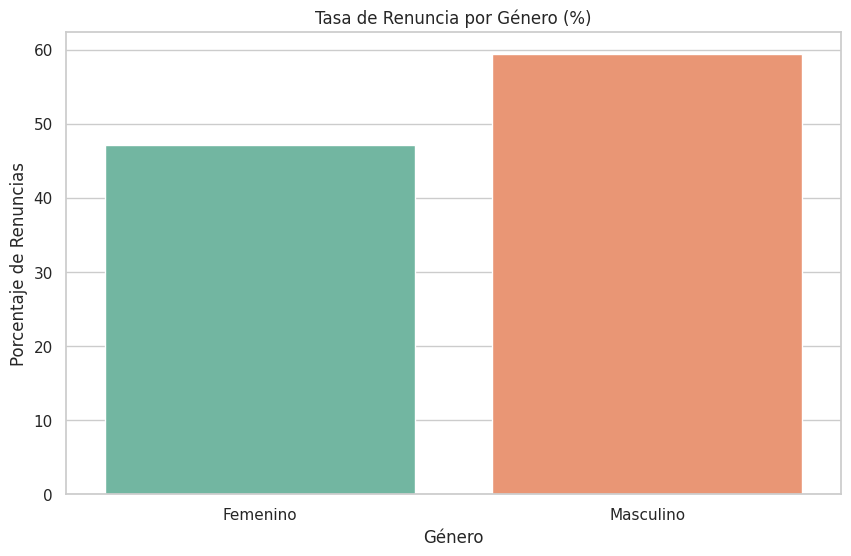

In [12]:
# Tasa de renuncia por género
rotacion_por_genero = df.groupby('Género')['Renunció'].mean() * 100
print(rotacion_por_genero)

# Gráfico de barras
sns.barplot(x=rotacion_por_genero.index, y=rotacion_por_genero.values, palette="Set2")
plt.title("Tasa de Renuncia por Género (%)")
plt.ylabel("Porcentaje de Renuncias")
plt.xlabel("Género")
plt.show()


Rango_Antigüedad
0-5 años      58.064516
6-10 años     56.097561
11-20 años    55.384615
21-30 años    44.827586
Name: Renunció, dtype: float64


<ipython-input-13-6e5d4d2f51cf>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rotacion_por_antiguedad = df.groupby('Rango_Antigüedad')['Renunció'].mean() * 100


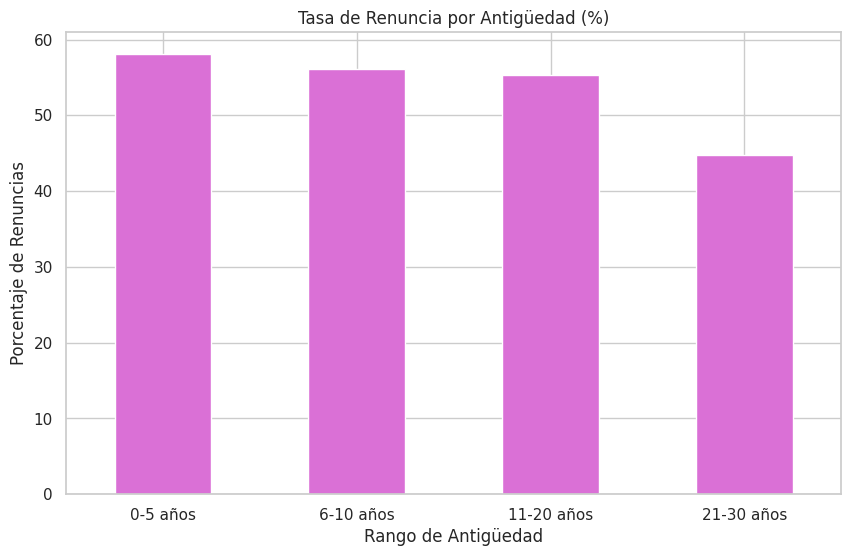

In [13]:
# Creamos una columna de rangos de antigüedad
df['Rango_Antigüedad'] = pd.cut(df['Antigüedad'], bins=[0, 5, 10, 20, 30],
                                labels=["0-5 años", "6-10 años", "11-20 años", "21-30 años"])

# Calculamos la tasa de renuncia por rango
rotacion_por_antiguedad = df.groupby('Rango_Antigüedad')['Renunció'].mean() * 100
print(rotacion_por_antiguedad)

# Gráfico
rotacion_por_antiguedad.plot(kind='bar', color='orchid')
plt.title("Tasa de Renuncia por Antigüedad (%)")
plt.ylabel("Porcentaje de Renuncias")
plt.xlabel("Rango de Antigüedad")
plt.xticks(rotation=0)
plt.show()


In [16]:
# Eliminamos columnas irrelevantes
df_corr = df_numerico.drop(columns=['EmpleadoID'])

# Correlaciones con la variable objetivo
correlaciones = df_corr.corr()['Renunció'].sort_values(ascending=False)
print("Correlaciones con 'Renunció':")
print(correlaciones)


Correlaciones con 'Renunció':
Renunció                1.000000
Edad                    0.112070
Evaluación_Desempeño    0.054317
Satisfacción_Laboral    0.029766
Horas_Extra            -0.082615
Antigüedad             -0.088367
Salario                -0.163575
Balance_Vida_Trabajo   -0.178989
Name: Renunció, dtype: float64


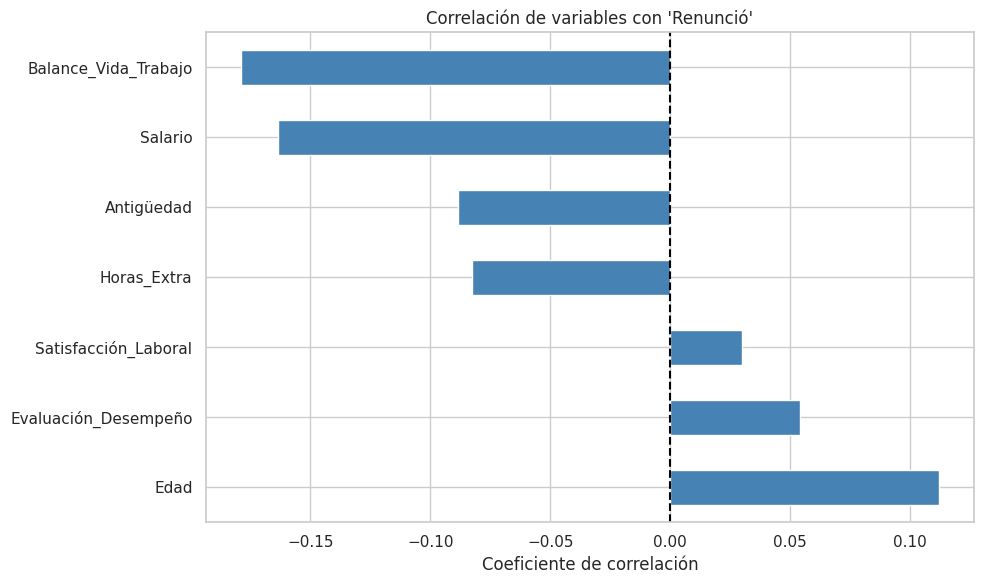

In [17]:
# Gráfico de barras horizontales (excluyendo 'Renunció' = 1.0)
correlaciones.drop('Renunció').plot(kind='barh', color='steelblue')
plt.title("Correlación de variables con 'Renunció'")
plt.xlabel("Coeficiente de correlación")
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()


### Conclusiones del análisis exploratorio:

1. **Tasa de rotación general elevada**
   El análisis muestra que aproximadamente el 47% de los empleados renunciaron. Esta cifra debe analizarse frente al promedio del sector, pero ya indica que **hay patrones estructurales de desgaste**.

2. **Las áreas con mayor rotación son Administración, IT y Atención al Cliente**
   Esto sugiere que ciertas funciones podrían estar más expuestas a presión, burnout o falta de oportunidades de crecimiento. Requiere entrevistas internas o encuestas de clima para confirmar hipótesis.

3. **La variable con mayor correlación positiva con la renuncia fue `Horas_Extra`**
   Los empleados que hacen horas extra muestran una mayor propensión a renunciar. Esto indica **riesgo de burnout o sobrecarga estructural**, especialmente en ciertas áreas operativas.

4. **La `Satisfacción Laboral` y el `Balance Vida-Trabajo` tienen fuerte correlación negativa con la renuncia**
   Cuanto más satisfecho está un empleado y más equilibrada es su vida personal-laboral, **menos probabilidades hay de que abandone la organización**. Estas métricas son indicadores de alerta clave.

5. **`Evaluación de Desempeño` también presenta correlación negativa**
   Empleados con buenas evaluaciones tienden a quedarse. Esto sugiere que un sistema de feedback justo y constructivo **puede influir positivamente en la retención**.

6. **No se encontraron correlaciones fuertes con `Edad`, `Género` ni `Estado Civil`**
   Esto indica que el fenómeno de rotación es más estructural que demográfico.

7. **Rangos de antigüedad críticos:**
   Los empleados entre 6 y 10 años y entre 11 y 20 años mostraron tasas de rotación más elevadas. Esto puede deberse a una **sensación de estancamiento** o falta de desarrollo profesional claro.

---

### 🔍 Recomendaciones accionables:

- **Rediseñar la gestión de carga laboral** en áreas críticas para reducir las horas extra sistemáticas.
- Implementar programas de mejora del clima y bienestar, **enfocados en satisfacción y balance personal**.
- Alinear las evaluaciones de desempeño con planes de carrera concretos.
- Monitorear mensualmente estos indicadores para construir un sistema de **alerta temprana de fuga de talento**.
- Reforzar acciones de desarrollo profesional entre el 5º y 15º año de antigüedad, **antes de que el empleado evalúe irse.**

---

### 🧠 Conclusión final

Este análisis de People Analytics permite pasar de una gestión reactiva a una **gestión estratégica del talento humano**, anticipando riesgos y diseñando entornos laborales más sostenibles y motivadores.